<a href="https://colab.research.google.com/github/RishJosh/Sem-I/blob/main/24566027_RishabhJoshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Requisite Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler

**Function for printing headings**

In [ ]:
def heading(text):
    print('-'*40)
    print(text.center(40))
    print('-'*40)

**Loading Kaggle Data Set to Colab indep of Local Drive or Google Drive**


In [ ]:
# Step 1 : Use Colab’s Environment Variables for Kaggle Credentials

os.environ['KAGGLE_USERNAME'] = 'rishabhjoshi24566027'
os.environ['KAGGLE_KEY'] = '0d7a70df237f7f397de44184c35ab6b4'

# Step 2 : Download the Dataset Using Kaggle API

!kaggle datasets download -d uom190346a/ai-powered-job-market-insights

# Step 3 : Unzip the Downloaded Dataset

!unzip ai-powered-job-market-insights.zip

# Step 4 : Load the CSV into Pandas

df = pd.read_csv('ai_job_market_insights.csv')
df.head()  # Display the first few rows

Dataset URL: https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights
License(s): CC0-1.0
ai-powered-job-market-insights.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ai-powered-job-market-insights.zip
replace ai_job_market_insights.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ai_job_market_insights.csv  


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


# Univariate Analysis

**Shape (Rows, Columns) of the DataFrame**

In [ ]:
print("(Rows, Columns) held in the AI Job Mmarket Insights Dataset are :-", df.shape)

(Rows, Columns) held in the AI JobMmarket Insights dataset are :- (500, 10)


**Missing Values in Columns of the Dataset**

In [ ]:
df.isnull().sum()

# 0 in all columns represent that the Dataset is fully filled

,0
Job_Title,0
Industry,0
Company_Size,0
Location,0
AI_Adoption_Level,0
Automation_Risk,0
Required_Skills,0
Salary_USD,0
Remote_Friendly,0
Job_Growth_Projection,0


**Obtain Information about data types and non-null values**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


**Five Number Summary of the Numerical Data column**

In [ ]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


**Descriptive Analysis of all Categorical Variables**

In [ ]:
df.describe(include = "object")

# 'freq' gives frequency of the most repeated unique categorical value given by 'top'

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Remote_Friendly,Job_Growth_Projection
count,500,500,500,500,500,500,500,500,500
unique,10,10,3,10,3,3,10,2,3
top,Data Scientist,Manufacturing,Small,San Francisco,Medium,Medium,Project Management,Yes,Growth
freq,62,58,171,62,179,173,60,251,169


**Unique Values of all Categorical Variables along with Frequencies**

In [ ]:
# Out of total 500 tuples with no Non Null Value

for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

Industry
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64

Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: count, dtype: int64

AI_Adoption_Level
Medium    179
Low       174
High      147
Name: count, dtype:

**Count Histograms of all Categorical Variables**

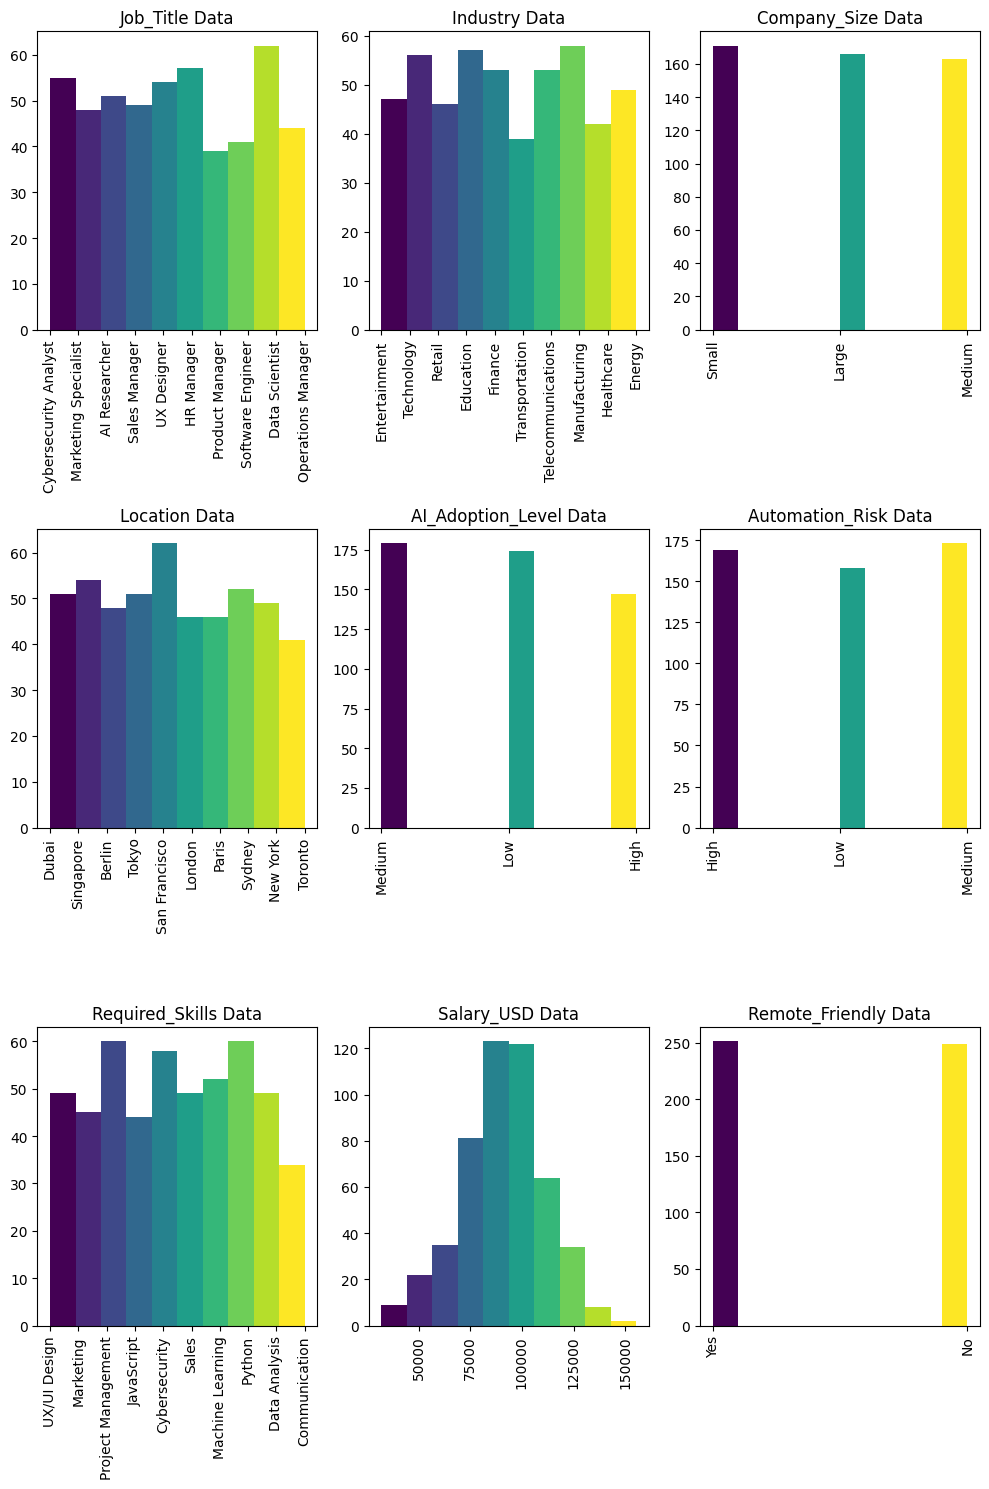

In [ ]:
plt.figure(figsize = (10, 15))

for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    counts, bins, patches = plt.hist(x = df[col])
    plt.title(f"{col} Data")
    plt.xticks(rotation = 90)

    # Assign different colors to each bar (patch)
    for patch, color in zip(patches, plt.cm.viridis(np.linspace(0, 1, len(patches)))):  # color array created by plt.cm.virdis
        patch.set_facecolor(color)  # Set the face color of each bar

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Multivariate Analysis

Variation of Avg Salary earned by different Job_Titles based on different categorical values
---
Key Insights
1.   Industry
     *   Project Managers have highest salaries in the retail industry.
     *   Salary in education sector is highly varying.

2.   Location
    *   Operatiom Managers have highest salaries in Berlin.
    *   Salaries in London and Dubai are comparatively lesser than the remaining countries.







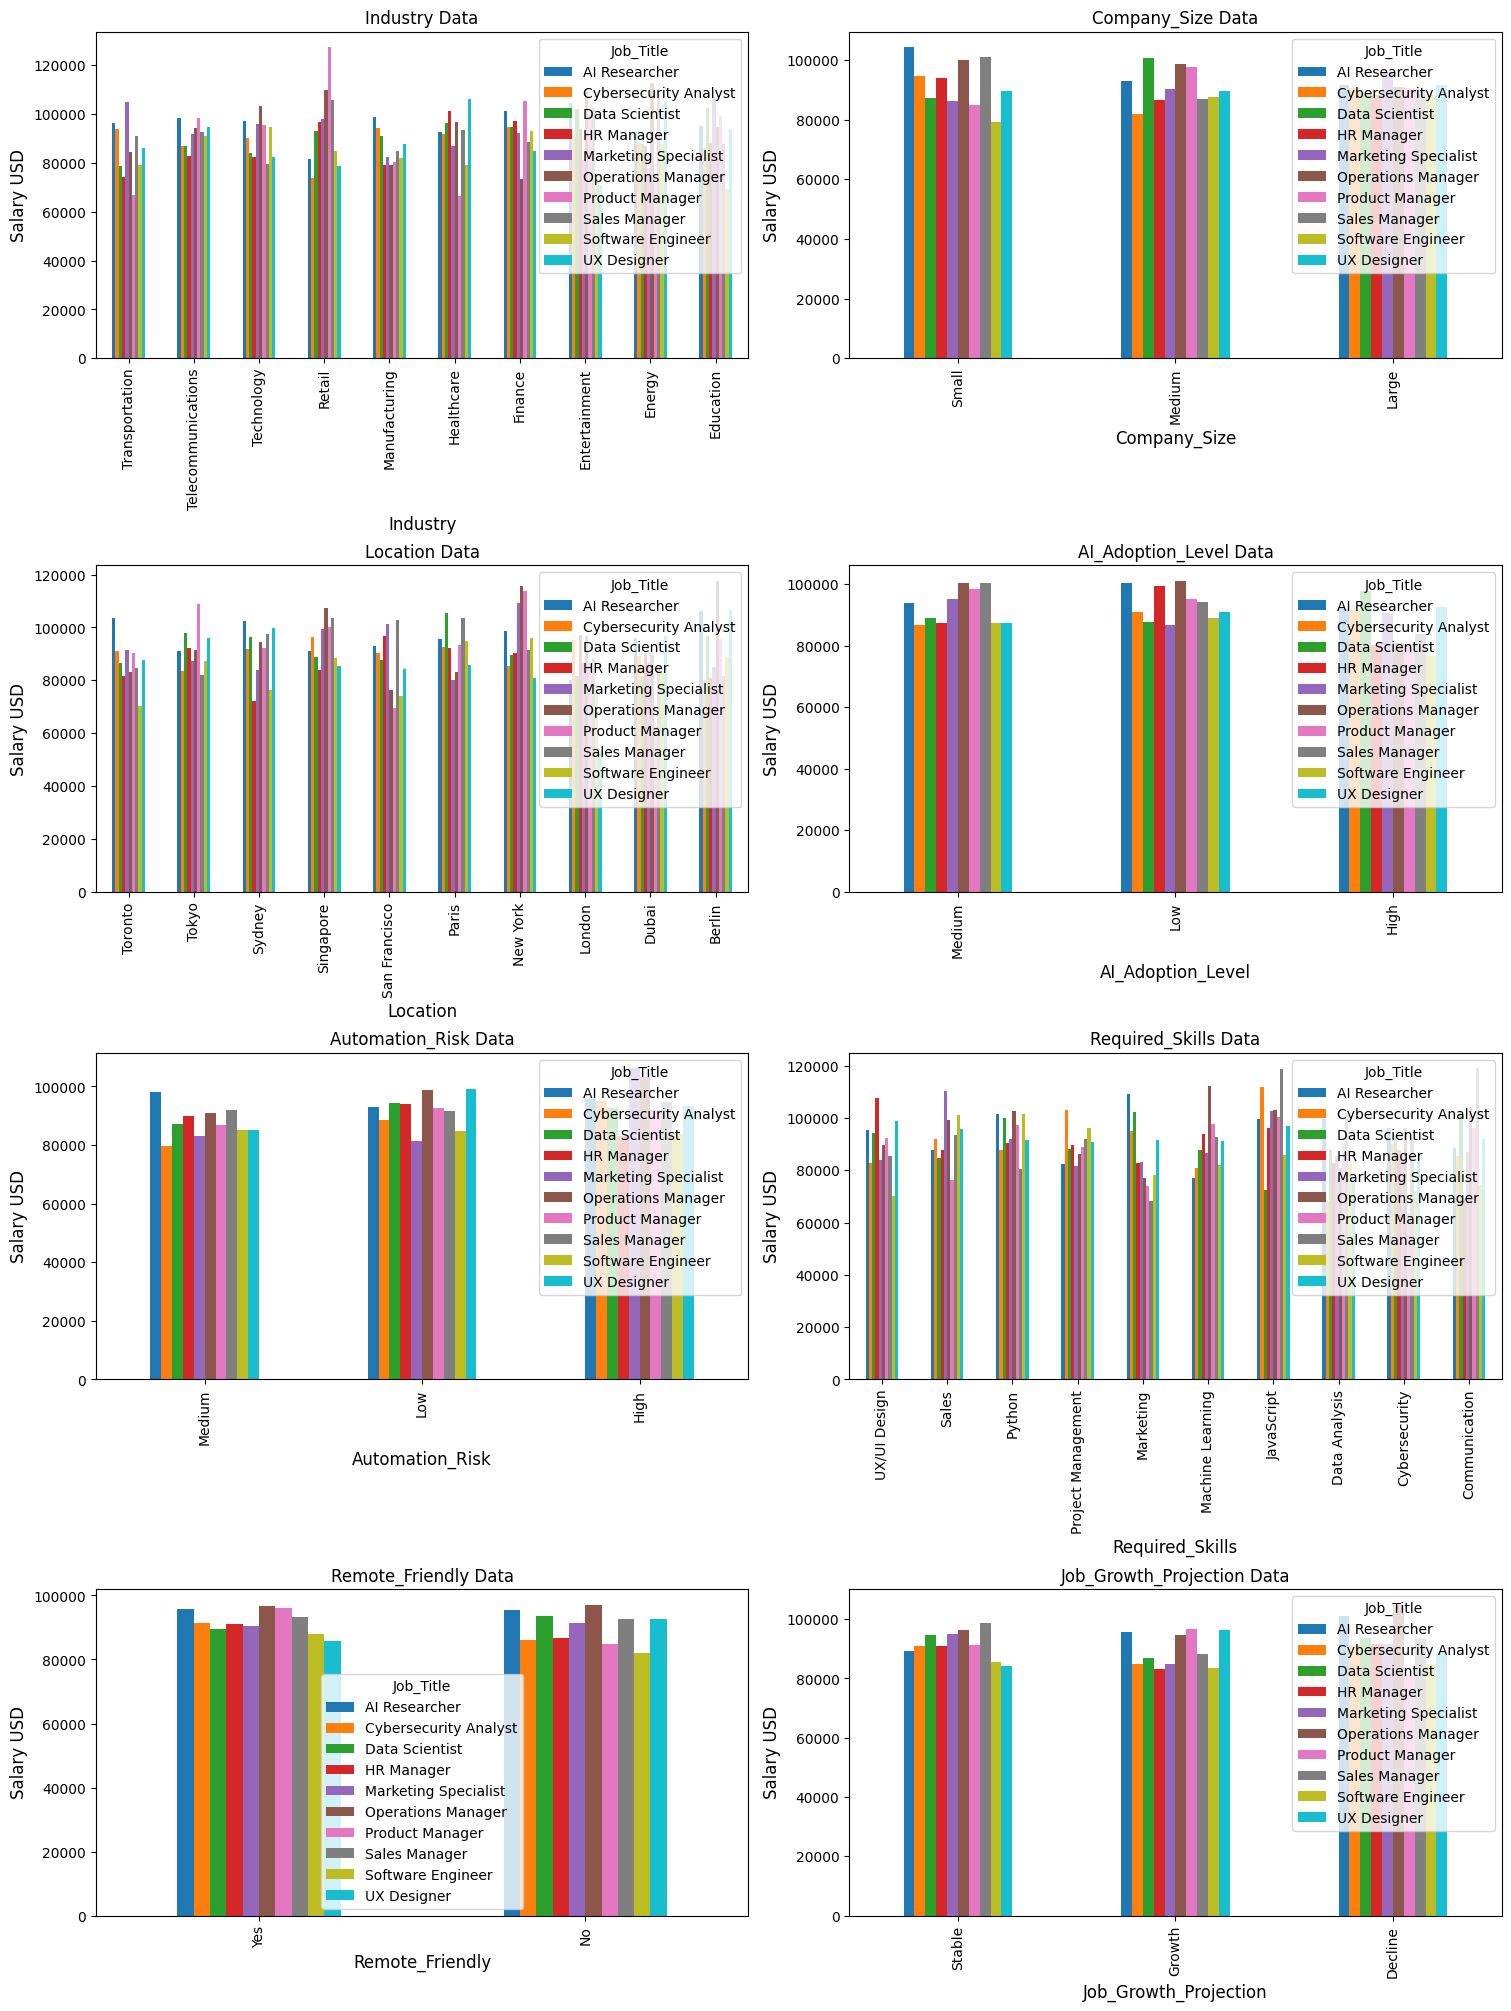

In [ ]:
# Exclude Job_Title & Salary_USD columns as they are being explicitly depicted in each graph
columns_to_plot = [col for col in df.columns if col not in ["Job_Title", "Salary_USD"]]

# Determine the number of rows needed (2 graphs per row)
ncols = 2         # 2 graphs to be displayed per row
nrows = int(np.ceil(len(columns_to_plot) / ncols))

# Adjust the size of the figure based on the number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20*nrows), constrained_layout=True)    # figsize = (width, height)
axes = axes.flatten()  # # Flatten axes for easy indexing

for i, col in enumerate(columns_to_plot):
    # Create the pivot table
    pt=df.pivot_table(index=col, columns="Job_Title", values="Salary_USD", aggfunc="mean").sort_index(ascending=False)

    # Plot each graph on the corresponding axis
    pt.plot.bar(ax=axes[i], figsize=(15, 20))  # Plot on the respective subplot
    axes[i].set_title(f"{col} Data", fontsize=12)   # Title for each subplot
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Salary USD", fontsize=12)

# If there are unused axes (due to uneven number of columns), turn them off
for j in range(i+1, len(axes)):
    axes[j].axis('off')  # Turn off unused subplots

plt.show()

**Distribution of Company Size**

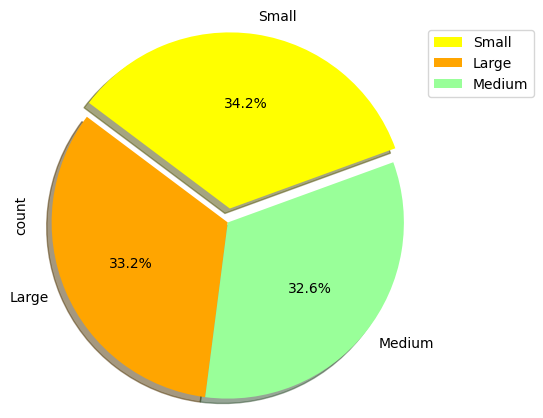

In [ ]:
# Define color options
colors = ['yellow', 'orange', '#99ff99']  # Light pink, light blue, light green

# Plot the pie chart
df["Company_Size"].value_counts().plot(
    kind='pie',
    startangle=20,
    autopct='%1.1f%%',  # Display percentage with one decimal place
    figsize=(5, 5),
    explode=(0.08, 0, 0),  # Explode first slice slightly
    shadow=True,
    colors=colors
)

# Customize labels (optional)
plt.legend(df["Company_Size"].unique(), loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside

plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

**Change objective type to numerical type**
So that the other column can also be utilised for Numerical Analysis

In [ ]:
df2=df.copy()
cat_cols = []
for col in df2.columns:
    if df2[col].dtypes == "object":
        cat_cols.append(col)

le = LabelEncoder()
for col in cat_cols:
    df2[col] = le.fit_transform(df2[col])
df2.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,1,2,2,1,2,0,9,111392.165243,1,1
1,4,7,0,6,2,0,5,93792.562466,0,0
2,0,7,0,6,2,0,9,107170.263069,1,1
3,7,6,2,0,1,0,6,93027.953758,0,1
4,1,2,2,8,1,1,3,87752.922171,1,0


**Correlation with target("Job_Growth_Projection")**

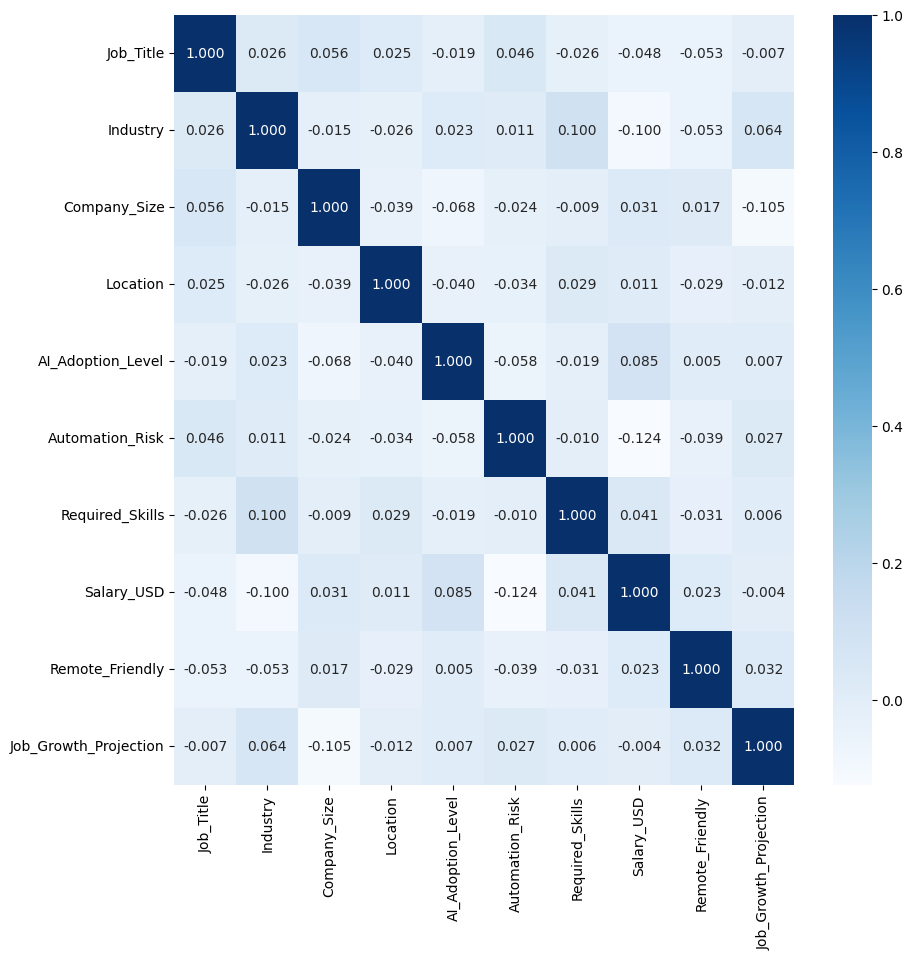

In [ ]:
df2_corr = df2.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(df2_corr, fmt = ".3f", annot = True, cmap = "Blues")
plt.show()

**Model Preparation**

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Standardization of X_train & X_test**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**ML - XGBRegressor**

<Axes: >

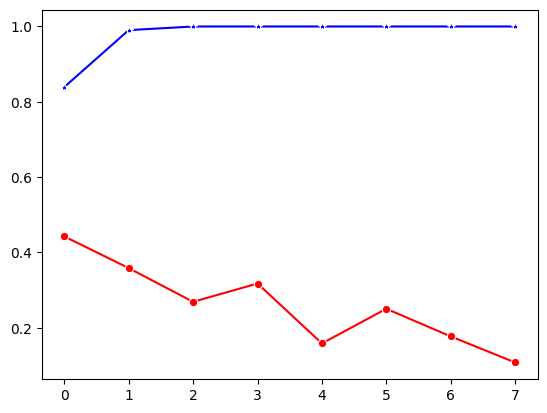

In [ ]:
from xgboost.sklearn import XGBRegressor
train_scores = []
test_scores = []
for i in range(2, 10):
    xgbr = XGBRegressor(n_estimators = i*50, max_depth = i+1, max_features = i*0.05)
    xgbr.fit(X_train, y_train)

    train_scores.append(abs(xgbr.score(X_train, y_train)))
    test_scores.append(abs(xgbr.score(X_test, y_test)))
sns.lineplot(train_scores, marker = '*', color = 'b')
sns.lineplot(test_scores, marker = 'o', color = 'r')

**XGBRegressor**

In [ ]:
# i = 7
xgbr = XGBRegressor(n_estimators = 250, max_depth = 6, max_features = 0.25)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_features=0.25,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=250,
             n_jobs=None, num_parallel_tree=None, ...)

# Prediction of XGBRegressor model

In [ ]:
y_xgbr = xgbr.predict(X_test)
y_xgbr

array([ 0.5950732 ,  0.8415929 ,  1.2177413 ,  0.62229794,  0.7032505 ,
        1.1564909 ,  1.5554855 , -0.2245384 ,  1.2609359 ,  1.3380735 ,
        0.6772717 ,  1.5368637 ,  0.86010915, -0.14789921,  1.6324345 ,
        0.53182757,  0.8901973 ,  1.0212992 ,  0.502455  ,  0.14437371,
        0.99628764,  0.37518632,  0.4494761 ,  1.1420783 ,  0.86486274,
        1.2323173 ,  0.07506223,  1.182886  ,  1.5349158 ,  0.662494  ,
        0.37374058,  0.81405586,  1.9726752 ,  0.23108402, -0.35459337,
        0.71096593,  0.98561734,  1.8907079 ,  0.36345288,  1.2561941 ,
        0.6494076 ,  0.2036549 ,  1.0131013 ,  1.0819687 ,  1.6748847 ,
        1.0414101 ,  0.9556822 ,  0.67975986,  0.923849  ,  0.7419761 ,
        1.2822238 ,  1.1974705 ,  0.33916357,  0.8702991 ,  0.9361319 ,
        1.0176234 ,  0.79230386,  1.2906935 ,  0.6915916 ,  1.8904972 ,
        0.5618658 ,  1.3626208 ,  0.91006154,  0.65662926,  1.2213662 ,
        0.8301793 ,  0.99074143,  1.6029726 ,  0.82344633,  0.49

**Mean Absolute Error**

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE Score :", mean_absolute_error(y_xgbr, y_test))

MAE Score : 0.783698878288269
